## Data visualization
### Understand the dataset by plotting

This is a low-dimensinoal digit recognition dataset. 

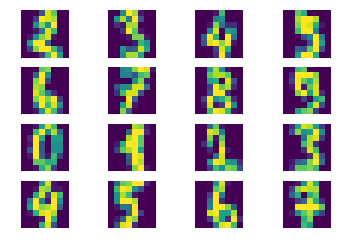

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


digits = load_digits()
X, y = digits.data, digits.target

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(X[i+1].reshape((8,8)))
    plt.axis('off')

plt.show()

In [33]:
X.shape

(1797, 64)

### Training and Testing Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Classification Methods

[  0.00000000e+00   1.68079646e-03   2.73900223e-02   9.93213928e-03
   9.44471007e-03   9.77605252e-03   1.15237298e-02   5.25106423e-04
   0.00000000e+00   8.74369231e-03   3.09842992e-02   3.72431231e-03
   1.10188975e-02   2.26642529e-02   4.06794029e-03   0.00000000e+00
   0.00000000e+00   4.51714876e-03   2.19001355e-02   2.08191592e-02
   2.75011995e-02   4.41858288e-02   1.13670765e-02   1.40355766e-03
   0.00000000e+00   9.50823179e-03   4.60611207e-02   2.48188110e-02
   2.65615897e-02   2.51157256e-02   3.47769470e-02   0.00000000e+00
   0.00000000e+00   2.79691278e-02   2.47835763e-02   2.75626480e-02
   3.33453815e-02   2.42263538e-02   2.65906309e-02   0.00000000e+00
   0.00000000e+00   5.14686661e-03   5.40486686e-02   4.43628092e-02
   3.07042620e-02   1.71841076e-02   2.17630132e-02   6.58125806e-04
   0.00000000e+00   2.54896868e-03   1.52962990e-02   2.51680097e-02
   1.92763716e-02   3.09373417e-02   2.61753230e-02   1.56666288e-03
   9.17061253e-05   1.13345845e-03

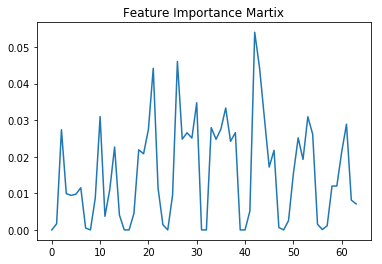

In [5]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=10)
rfmodel.fit(X_train,y_train)
print(rfmodel.feature_importances_)
plt.plot(rfmodel.feature_importances_)
plt.title("Feature Importance Martix")
plt.show()

[[  0.00000000e+00  -8.53012195e-03   1.54496238e-02   9.03317849e-03
   -1.80586704e-02  -7.81079167e-02  -5.67088989e-02  -9.85000682e-03
    0.00000000e+00  -2.12445644e-02  -8.17072823e-04   4.48850550e-02
    6.79516310e-02   2.92955330e-02   1.47599081e-02  -5.91000409e-03
   -5.14128795e-03   9.42842801e-03   3.89367111e-02  -2.46690089e-03
   -7.46606867e-02   5.40349393e-02  -5.20790625e-03   0.00000000e+00
   -2.57064398e-03  -4.97697901e-03  -1.57478650e-02  -3.30056901e-02
   -1.47326345e-01   3.32146807e-02  -1.33369523e-02   0.00000000e+00
    0.00000000e+00   6.05254889e-02   2.54527406e-02  -1.82890393e-02
   -1.36133149e-01  -5.84480509e-03  -9.33075525e-03   0.00000000e+00
    2.30392962e-19  -1.13268043e-02   6.14015755e-02  -8.40224894e-02
   -7.35603378e-02  -3.09688111e-02   9.86150573e-03   0.00000000e+00
    0.00000000e+00  -5.58262336e-02   1.57248507e-02  -4.35984500e-02
    2.49824737e-02  -1.84288788e-02  -3.42677794e-02  -2.40981088e-02
    0.00000000e+00  

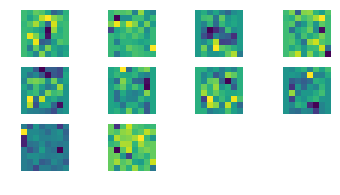

In [154]:
from sklearn.svm import LinearSVC
#lsmodel = SVC(kernel = 'linear',random_state=10)
lsmodel = LinearSVC(random_state=10)
lsmodel.fit(X_train,y_train)
print(lsmodel.coef_)
c=lsmodel.coef_
print(np.shape(c))
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(c[i].reshape((8,8)))
    plt.axis('off')

plt.show()


In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
gammas=[0.00001,0.001,0.01,0.1,1,10,100]
Cs = [0.01,0.1,1,10,100,1000]
parameters = {'gamma':gammas, 'C':Cs}
svc = SVC(kernel = 'rbf',random_state=10)
clf = GridSearchCV(svc, parameters,return_train_score=True)
clf.fit(X_train, y_train)
print('best parameters:',clf.best_params_,',testing accuracy:',clf.best_estimator_.score(X_test,y_test))


best parameters: {'C': 10, 'gamma': 0.001} ,testing accuracy: 0.983333333333


[[  0.00000000e+00  -4.66425776e-02  -3.30389125e-02   2.44893449e-02
   -8.60166214e-02  -3.16212774e-01  -1.95689006e-01  -2.89604050e-02
   -1.89933359e-05  -1.42094765e-01   2.12004881e-02   1.49404444e-01
    2.07389744e-01   1.81037369e-01  -9.94526667e-04  -2.80278514e-02
   -6.02361730e-03   1.88266708e-02   1.51555644e-01  -2.96013926e-02
   -3.41507660e-01   2.47481038e-01  -2.84456488e-02  -5.25993730e-03
   -3.00959381e-03   3.94862997e-02  -1.78230859e-02  -1.55727881e-01
   -6.50391802e-01   1.21963159e-01  -5.29130609e-02  -2.43648189e-04
    0.00000000e+00   1.83941701e-01   1.18364460e-01  -1.22859857e-01
   -6.04223633e-01  -5.99409657e-02   1.68007504e-02   0.00000000e+00
   -1.20378218e-03  -4.48360800e-02   2.84723550e-01  -3.06313056e-01
   -3.43885889e-01  -8.20705035e-02   6.75813386e-02  -1.99085912e-04
   -1.89142094e-03  -1.77910132e-01   9.37097856e-02  -1.80165431e-01
    1.01669502e-01  -5.98571377e-02  -1.43813801e-01  -6.49385996e-02
   -4.95034579e-06  

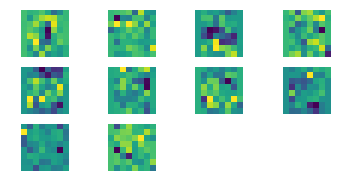

In [155]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression(random_state=10)
lrmodel.fit(X_train, y_train)
print(lrmodel.coef_)
c=lrmodel.coef_
print(np.shape(c))
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(c[i].reshape((8,8)))
    plt.axis('off')

plt.show()

## Plotting Learning Curves





In [21]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




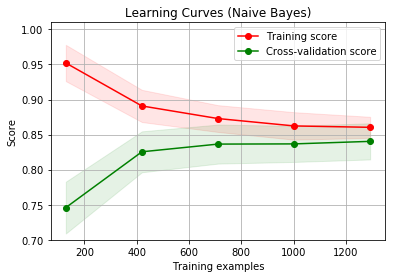

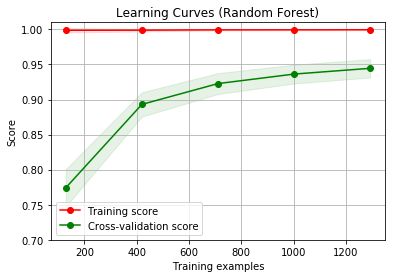

In [24]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

estimator = RandomForestClassifier(random_state=10)
plot_learning_curve(estimator,  "Learning Curves (Random Forest)", X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()



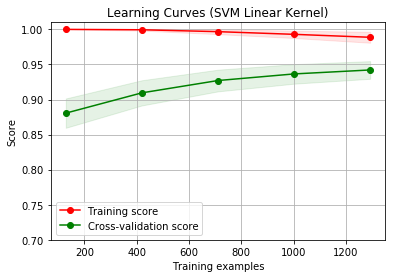

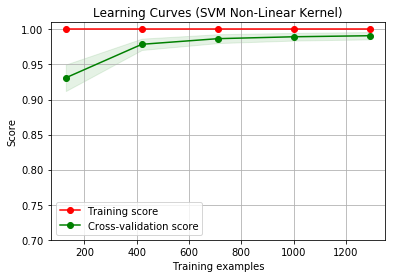

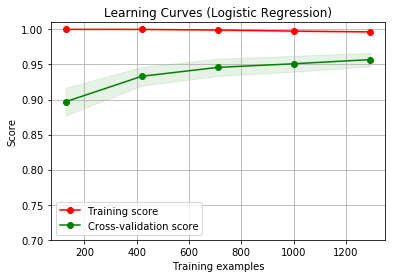

In [139]:
estimator = LinearSVC(random_state=10)
plot_learning_curve(estimator,  "Learning Curves (SVM Linear Kernel)", X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

estimator =  SVC(kernel = 'rbf',random_state=10,gamma=0.001,C =10)
plot_learning_curve(estimator,  "Learning Curves (SVM Non-Linear Kernel)", X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

estimator = LogisticRegression(random_state=10)
plot_learning_curve(estimator,  "Learning Curves (Logistic Regression)", X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()



###  Use Multi-Layer Perception

0.0082817201213


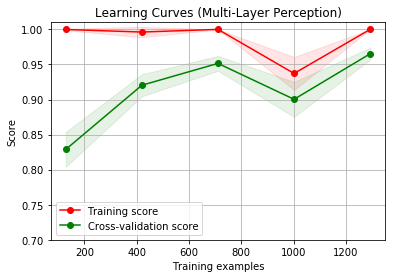

In [140]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, ),random_state=10)
mlp.fit(X_train,y_train)
print(mlp.loss_)
plot_learning_curve(mlp,  "Learning Curves (Multi-Layer Perception)", X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

### CNN

In [93]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD

In [126]:
data_train = []
for i in range(len(X_train)):
    data_train.append(X_train[i].reshape(8,8))
data_train = np.asarray(data_train)
data_train = data_train.reshape(data_train.shape[0],8, 8,1)

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)


classifier = Sequential()
classifier.add((Conv2D(10,kernel_size=(3, 3),activation='relu', input_shape=(8, 8, 1))))


# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(30, activation = 'relu'))
classifier.add(Dense(10, activation = 'softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compiling the CNN
classifier.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    

In [127]:
classifier.fit(data_train, Y_train, batch_size=1, epochs=10, validation_split=0.3)


Train on 1131 samples, validate on 486 samples
Epoch 1/10
1131/1131 [==============================] - 3s - loss: 2.1202 - acc: 0.2697 - val_loss: 1.9034 - val_acc: 0.3066
Epoch 2/10
1131/1131 [==============================] - 2s - loss: 1.9254 - acc: 0.3077 - val_loss: 1.8862 - val_acc: 0.2737
Epoch 3/10
1131/1131 [==============================] - 2s - loss: 2.1553 - acc: 0.2847 - val_loss: 1.9628 - val_acc: 0.2654
Epoch 4/10
1131/1131 [==============================] - 2s - loss: 2.0133 - acc: 0.2617 - val_loss: 2.0054 - val_acc: 0.2510
Epoch 5/10
1131/1131 [==============================] - 2s - loss: 2.0802 - acc: 0.2228 - val_loss: 2.0892 - val_acc: 0.2037
Epoch 6/10
1131/1131 [==============================] - 2s - loss: 2.0127 - acc: 0.2538 - val_loss: 2.0587 - val_acc: 0.3683
Epoch 7/10
1131/1131 [==============================] - 2s - loss: 1.9588 - acc: 0.2953 - val_loss: 1.9698 - val_acc: 0.2346
Epoch 8/10
1131/1131 [==============================] - 2s - loss: 1.9854 - ac

In [134]:
data_test = []
for i in range(len(X_test)):
    data_test.append(X_test[i].reshape(8,8))
data_test = np.asarray(data_test)
data_test = data_test.reshape(data_test.shape[0],8, 8,1)

from keras.utils import np_utils
Y_test = np_utils.to_categorical(y_test, 10)

In [137]:
score = classifier.evaluate(data_test, Y_test, batch_size=1)
score

170/180 [===========================>..] - ETA: 0s

[2.0004281209574803, 0.27777777777777779]